In [200]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


# Przygotowanie danych

In [201]:
data = pd.read_csv('countries of the world.csv', decimal=',')
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [202]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [203]:
#data.fillna(0,inplace=True)
#data.dropna(inplace=True)
for col in data:
    data[col].fillna(method='pad',inplace=True)
    
data = data.set_index('Country')

data['Region'] = pd.factorize(data['Region'])[0] + 1


In [204]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for i in data:
    data[i]=scaler.fit_transform(data[[i]])
data.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,-1.804857,0.019695,0.027583,-0.199844,-0.293443,4.717100,3.606435,-0.893094,-2.364138,-1.017889,-0.138073,-0.522370,0.380319,-1.664660,2.194855,2.242807,1.585890,-0.329355,-1.086045
Albania,-1.399612,-0.213877,-0.318797,-0.153603,-0.275974,-1.011107,-0.397509,-0.513931,0.197228,-0.717395,0.542496,-0.016758,-0.432530,1.187248,-0.634044,-0.807466,0.560968,-0.702778,0.104758
Algeria,-0.994367,0.035618,0.998421,-0.220490,-0.292889,-0.081987,-0.129354,-0.364262,-0.639654,-0.686904,-0.814845,-0.518758,0.928807,-1.664660,-0.451679,-0.930526,-0.346227,2.255880,-1.576727
American Samoa,-0.589122,-0.243834,-0.334779,-0.053514,0.514709,-4.240514,-0.744018,-0.164702,0.729789,0.114708,-0.299860,1.256901,-0.401029,-0.238706,0.026242,-1.200854,-0.346227,2.255880,-1.576727
Andorra,-0.183878,-0.243720,-0.334629,-0.137002,-0.293443,1.348530,-0.891673,0.932874,0.881949,1.165111,-0.890801,-0.548854,1.006015,1.187248,-1.208987,-0.599676,-0.346227,2.255880,-1.576727


# KMeans

In [205]:
X = data.copy()
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [206]:
cent = kmeans.cluster_centers_
cent

array([[-0.01097315, -0.10594414,  0.05725824,  0.28120364,  0.102574  ,
         0.39586157, -0.7839432 ,  1.09265483,  0.65708992,  1.15025701,
         0.15475372, -0.30490868,  0.03062947,  0.62637266, -0.91271155,
        -0.14162422, -0.68140416, -0.29306586,  0.83862814],
       [-0.01127333, -0.08057864, -0.05483994, -0.1864875 , -0.28445471,
         0.03583946,  1.47333446, -0.79368411, -1.17409418, -0.96901789,
        -0.1786537 , -0.23674832,  0.26679442, -0.43675502,  1.35920788,
         1.21133011,  1.13639617, -0.09756145, -0.8897937 ],
       [ 0.01460965,  0.12548017, -0.01360216, -0.11244845,  0.07823984,
        -0.32270356, -0.21188082, -0.39887929,  0.14407491, -0.3463501 ,
        -0.01999214,  0.36380164, -0.17045009, -0.2387059 , -0.05044755,
        -0.55908173, -0.10469471,  0.27804344, -0.15151276]])

# Elbow method

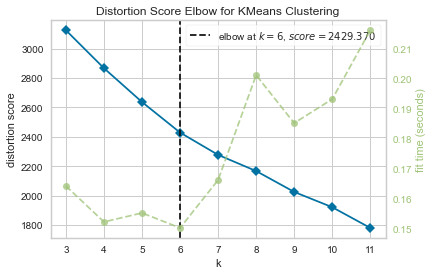

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [212]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))
visualizer.fit(X)
visualizer.show()

#Metoda łokcia wskazuje optymalną liczbę klastrów

# Dendrogram

In [210]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

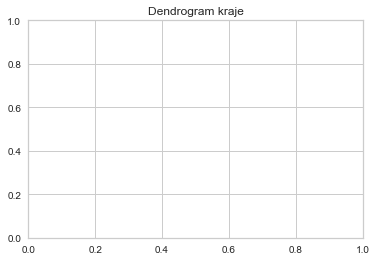

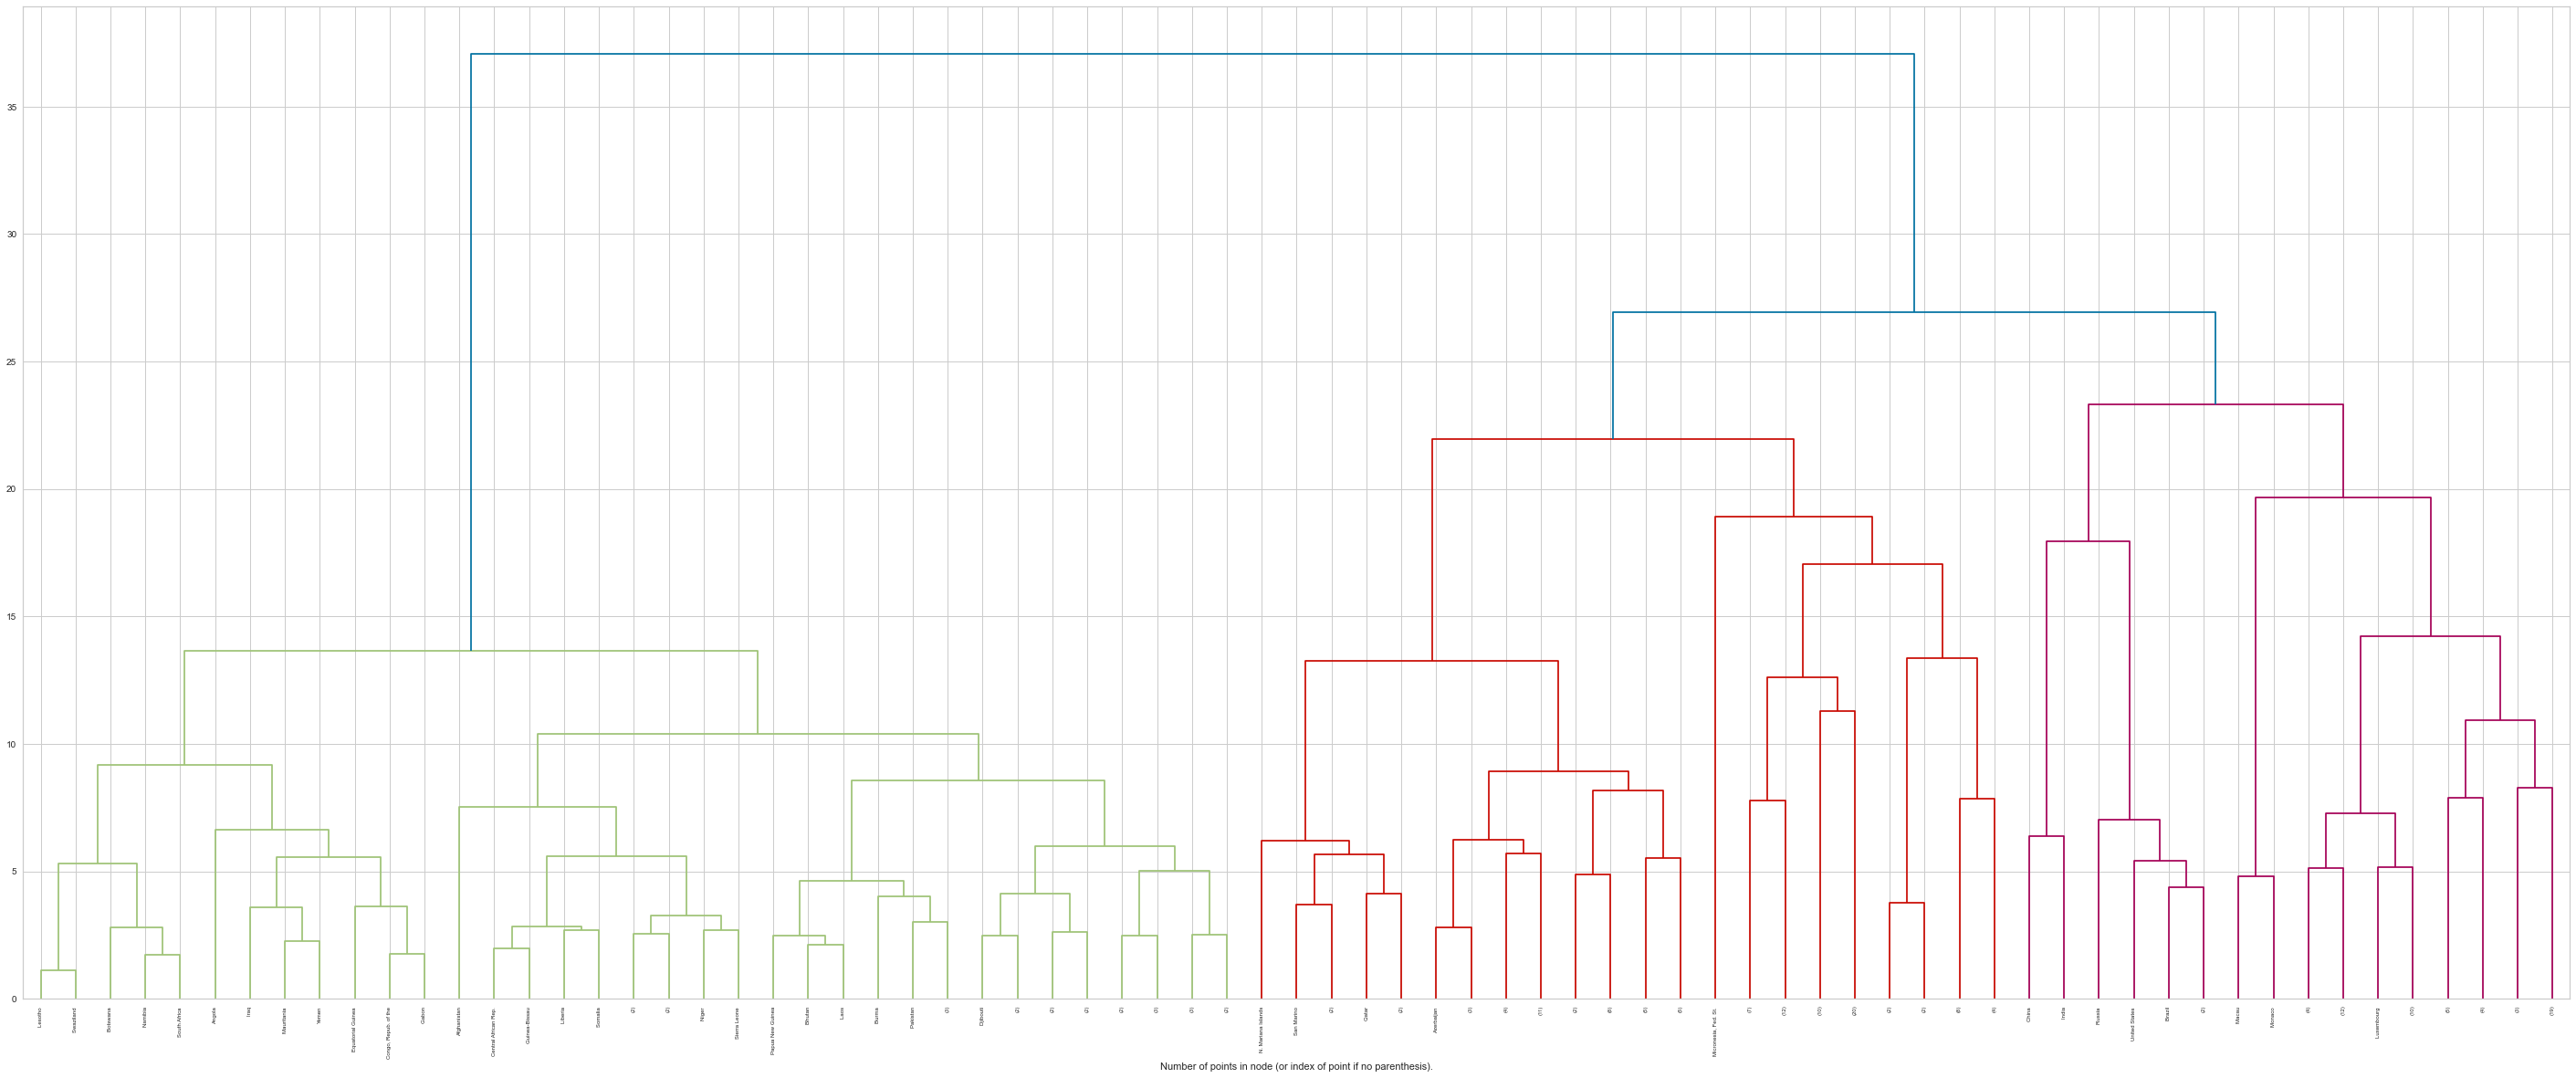

In [199]:
from sklearn.datasets import load_iris

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plt.title("Dendrogram kraje")
plt.figure(figsize=(50,20))
plot_dendrogram(model, truncate_mode = 'level', p=6, labels=X.index )
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()